Parte addestramento della svm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
import scipy
from scipy import optimize
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [3]:
#da cambiare con nuova destinazione su drive Davide
%cd "/content/drive/My Drive/universita/progetto ml/"
filein = "vettori.csv"

df = np.genfromtxt(filein, delimiter=',', skip_header=1, filling_values=-999, dtype='float', usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
X = df[:,0:18]
Y = df[:,19]


/content/drive/My Drive/universita/progetto ml


# Feature Selection

Optimal number of features : 12


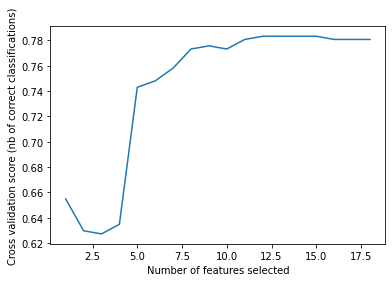

Feature selezionate: [ 0  1  2  4  5  6  7  8  9 10 11 12]


In [8]:
# Recursive Feature Elimination
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

class RandomForestClassifierWithCoef(RandomForestClassifier):
    def fit(self, *args, **kwargs):
        super(RandomForestClassifierWithCoef, self).fit(*args, **kwargs)
        self.coef_ = self.feature_importances_

feature_names=["Pag. taggate nella didascalia","Pag. taggate nella foto","Business account","Geolocalizzazione","Score persona","X1 persona","Y1 persona","X2 persona","Y2 persona","Score borsa","X1 borsa","Y1 borsa","X2 borsa","Y2 borsa","Score orologio","X1 orologio","Y1 orologio","X2 orologio","Y2 orologio","Pubblicitario"]
# create a base classifier used to evaluate a subset of attributes
#model = svm.SVC(kernel='linear')
model = RandomForestClassifierWithCoef(n_estimators=500, min_samples_leaf=5, n_jobs=-1)
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2),scoring='accuracy')
rfecv.fit(X,Y)

print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
result = np.where(rfecv.support_ == True)
print("Feature selezionate: " + str(result[0]))

In [9]:
for i in result[0]:
  print(feature_names[i])

Pag. taggate nella didascalia
Pag. taggate nella foto
Business account
Score persona
X1 persona
Y1 persona
X2 persona
Y2 persona
Score borsa
X1 borsa
Y1 borsa
X2 borsa


#Addestramento

In [13]:
# Ricarico il dataset mantenendo solo le feature selezionate
X=df[:,result[0]]

#divido il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=109) # 70% training and 30% test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(277, 12)
(120, 12)
(277,)
(120,)


In [14]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-6], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'gamma': [1e-1, 1e-6], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-1, 1e-6], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print()
    print(clf.best_params_.get('C'))

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

Best parameters set found on development set:

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}

Grid scores on development set:

0.821 (+/-0.110) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.447 (+/-0.486) for {'C': 1, 'gamma': 1e-06, 'kernel': 'rbf'}
0.827 (+/-0.083) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.447 (+/-0.486) for {'C': 10, 'gamma': 1e-06, 'kernel': 'rbf'}
0.828 (+/-0.046) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.447 (+/-0.486) for {'C': 100, 'gamma': 1e-06, 'kernel': 'rbf'}
0.805 (+/-0.087) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.701 (+/-0.095) for {'C': 1000, 'gamma': 1e-06, 'kernel': 'rbf'}
0.813 (+/-0.095) for {'C': 1, 'kernel': 'linear'}
0.809 (+/-0.094) for {'C': 10, 'kernel': 'linear'}
0.805 (+/-0.097) for {'C': 100, 'kernel': 'linear'}
0.809 (+/-0.094) for {'C': 1000, 'kernel': 'linear'}
0.847 (+/-0.042) for {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.350 (+/-0.410) for {'C': 1, 'gamma': 1e-06, 'kernel': 'poly'}
0.840 (+/-0.046) for {'C': 10, 'gamma'

In [0]:
#SVM kernel lineare
clf_lineare = svm.SVC(kernel='linear')
clf_lineare.fit(X_train, y_train)
y_pred_lineare = clf_lineare.predict(X_test)

#SVM kernel rbf
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)

#SVM kernel rbf auto
clf_rbf_auto = svm.SVC(kernel='rbf', gamma='auto')
clf_rbf_auto.fit(X_train, y_train)
y_pred_rbf_auto = clf_rbf_auto.predict(X_test)

#SVM kernel poly
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train)
y_pred_poly = clf_poly.predict(X_test)

#SVM kernel poly auto
clf_poly_auto = svm.SVC(kernel='poly', gamma='auto')
clf_poly_auto.fit(X_train, y_train)
y_pred_poly_auto = clf_poly_auto.predict(X_test)

#SVM kernel sigmoid
clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = clf_sigmoid.predict(X_test)

#SVM kernel sigmoid auto
clf_sigmoid_auto = svm.SVC(kernel='sigmoid', gamma='auto')
clf_sigmoid_auto.fit(X_train, y_train)
y_pred_sigmoid_auto = clf_sigmoid_auto.predict(X_test)


#con grid_search
C_use = clf.best_params_.get('C')
gamma_use = clf.best_params_.get('gamma')
kernel_use = clf.best_params_.get('kernel')

clf_grid_search=svm.SVC(C = C_use, kernel = kernel_use, gamma = gamma_use)
clf_grid_search.fit(X_train, y_train)
y_pred_grid_search = clf_grid_search.predict(X_test)


In [16]:
#Accuracy, Precision, Recall per SVM con kernel lineare
print("Accuracy, Precision, Recall per SVM con kernel lineare\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lineare))
print("Precision:",metrics.precision_score(y_test, y_pred_lineare))
print("Recall:",metrics.recall_score(y_test, y_pred_lineare), "\n\n")

#Accuracy, Precision, Recall per SVM con kernel rbf
print("Accuracy, Precision, Recall per SVM con kernel rbf\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))
print("Precision:",metrics.precision_score(y_test, y_pred_rbf))
print("Recall:",metrics.recall_score(y_test, y_pred_rbf), "\n\n")

#Accuracy, Precision, Recall per SVM con kernel rbf auto
print("Accuracy, Precision, Recall per SVM con kernel rbf auto\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf_auto))
print("Precision:",metrics.precision_score(y_test, y_pred_rbf_auto))
print("Recall:",metrics.recall_score(y_test, y_pred_rbf_auto), "\n\n")

#Accuracy, Precision, Recall per SVM con kernel poly
print("Accuracy, Precision, Recall per SVM con kernel poly \n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_poly))
print("Precision:",metrics.precision_score(y_test, y_pred_poly))
print("Recall:",metrics.recall_score(y_test, y_pred_poly), "\n\n")

#Accuracy, Precision, Recall per SVM con kernel poly auto
print("Accuracy, Precision, Recall per SVM con kernel poly auto \n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_poly_auto))
print("Precision:",metrics.precision_score(y_test, y_pred_poly_auto))
print("Recall:",metrics.recall_score(y_test, y_pred_poly_auto), "\n\n")

#Accuracy, Precision, Recall per SVM con kernel sigmoid
print("Accuracy, Precision, Recall per SVM con kernel sigmoid\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("Precision:",metrics.precision_score(y_test, y_pred_sigmoid))
print("Recall:",metrics.recall_score(y_test, y_pred_sigmoid), "\n\n")

#Accuracy, Precision, Recall per SVM con kernel sigmoid auto
print("Accuracy, Precision, Recall per SVM con kernel sigmoid\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid_auto))
print("Precision:",metrics.precision_score(y_test, y_pred_sigmoid_auto))
print("Recall:",metrics.recall_score(y_test, y_pred_sigmoid_auto), "\n\n")

print("Accuracy, Precision, Recall per SVM con utilizzo grid search\n\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_grid_search))
print("Precision:",metrics.precision_score(y_test, y_pred_grid_search))
print("Recall:",metrics.recall_score(y_test, y_pred_grid_search), "\n\n")

Accuracy, Precision, Recall per SVM con kernel lineare

Accuracy: 0.775
Precision: 0.7538461538461538
Recall: 0.8166666666666667 


Accuracy, Precision, Recall per SVM con kernel rbf

Accuracy: 0.7916666666666666
Precision: 0.7692307692307693
Recall: 0.8333333333333334 


Accuracy, Precision, Recall per SVM con kernel rbf auto

Accuracy: 0.7916666666666666
Precision: 0.7692307692307693
Recall: 0.8333333333333334 


Accuracy, Precision, Recall per SVM con kernel poly 

Accuracy: 0.7416666666666667
Precision: 0.6883116883116883
Recall: 0.8833333333333333 


Accuracy, Precision, Recall per SVM con kernel poly auto 

Accuracy: 0.725
Precision: 0.6666666666666666
Recall: 0.9 


Accuracy, Precision, Recall per SVM con kernel sigmoid

Accuracy: 0.6416666666666667
Precision: 0.6268656716417911
Recall: 0.7 


Accuracy, Precision, Recall per SVM con kernel sigmoid

Accuracy: 0.675
Precision: 0.6615384615384615
Recall: 0.7166666666666667 


Accuracy, Precision, Recall per SVM con utilizzo grid se

In [0]:
#esportazione della SVM addestrata
import pickle

filename = 'finalized_model_feature_selected.sav'
pickle.dump(clf_grid_search, open(filename, 'wb'))